In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

weather = pd.read_csv('./weatherAUS.csv')
weather
#overview of the dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [56]:
weather.isnull().sum()/len(weather)

Date             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.009888
RISK_MM          0.000000
RainTomorrow     0.000000
dtype: float64

In [57]:
#dropping columns with more than 35 percent NaN values and RISK_MM column
weather = weather.drop(['Evaporation', 'Sunshine','Cloud9am','Cloud3pm', 'RISK_MM'], axis = 1)
weather


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [58]:
#check for data types
weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [59]:
#converting 'Date' column to datetime format
weather['Date'] = pd.to_datetime(weather['Date'])

In [60]:
#too much data for my computer to process, only keeping most recent 5 years.
import datetime
weather = weather[weather['Date'].dt.year > 2012]
weather = weather.reset_index(drop=True)

In [61]:
#creating separate columns for year,month,day to process later
weather['Year'] = weather['Date'].dt.year
weather['Month'] = weather['Date'].dt.month
weather['Day'] = weather['Date'].dt.day

In [62]:
#dropping original date column
weather = weather.drop('Date', axis=1)
weather

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,12.1,34.5,0.0,W,44.0,SE,W,4.0,22.0,...,16.0,1012.8,1009.3,22.3,32.7,No,No,2013,1,1
1,Albury,13.8,33.6,0.0,SSE,28.0,SSW,ESE,9.0,11.0,...,17.0,1012.2,1010.9,21.4,31.2,No,No,2013,1,2
2,Albury,15.8,36.9,0.0,E,22.0,S,SSW,7.0,11.0,...,20.0,1015.8,1011.9,23.6,33.9,No,No,2013,1,3
3,Albury,18.6,40.7,0.0,ENE,44.0,ESE,N,7.0,24.0,...,12.0,1012.3,1008.1,27.8,39.3,No,No,2013,1,4
4,Albury,19.8,43.4,0.0,NW,81.0,S,ESE,7.0,11.0,...,17.0,1012.4,1009.8,30.7,42.4,No,Yes,2013,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76697,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,...,27.0,1024.7,1021.2,9.4,20.9,No,No,2017,6,20
76698,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,...,24.0,1024.6,1020.3,10.1,22.4,No,No,2017,6,21
76699,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,...,21.0,1023.5,1019.1,10.9,24.5,No,No,2017,6,22
76700,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,...,24.0,1021.0,1016.8,12.5,26.1,No,No,2017,6,23


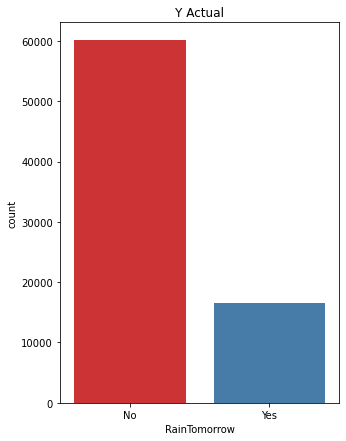

In [63]:
#Looking at if it rains tomorrow
f, ax = plt.subplots(figsize=(5, 7))
ax = sns.countplot(x="RainTomorrow", data=weather, palette="Set1")
plt.title('Y Actual')
plt.show()

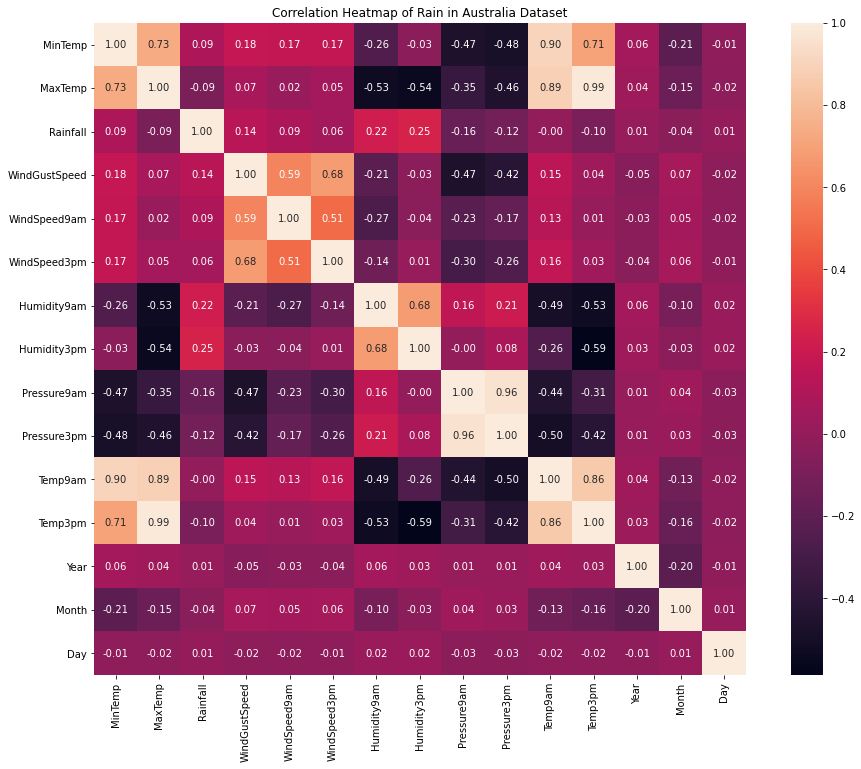

In [64]:
#check for correlation
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(weather.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
plt.show()

In [65]:
#removing temp3pm and temp9am as they are really close to maxtemp and I would rather use max and min temp
weather = weather.drop(['Temp9am','Temp3pm'], axis=1)

In [66]:
#all categoricals
categorical = [x for x in weather.columns if weather[x].dtype=='O']

print('categorical variables: ', categorical)

categorical variables:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [67]:
#numericals
numerical = [x for x in weather.columns if weather[x].dtype!='O']

print('categorical variables: ', numerical)

categorical variables:  ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Year', 'Month', 'Day']


In [68]:
#check summary statistics for outliers
print(round(weather[numerical].describe()),2)

#we find Rainfall definitely has outliers, the 2 windspeeds seem to have outliers

       MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
count  76400.0  76527.0   75915.0        72468.0       76147.0       74879.0   
mean      12.0     24.0       2.0           40.0          14.0          19.0   
std        6.0      7.0       8.0           14.0           9.0           9.0   
min       -8.0     -5.0       0.0            6.0           0.0           0.0   
25%        8.0     18.0       0.0           31.0           7.0          13.0   
50%       12.0     23.0       0.0           39.0          13.0          17.0   
75%       17.0     29.0       1.0           48.0          19.0          24.0   
max       32.0     47.0     247.0          135.0         130.0          83.0   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Year    Month  \
count      75945.0      73984.0      68725.0      68735.0  76702.0  76702.0   
mean          69.0         51.0       1018.0       1015.0   2015.0      6.0   
std           20.0         21.0          7

In [69]:
#filling those 3 with potential outliers with median
weather['Rainfall'].fillna(weather['Rainfall'].median(), inplace=True)
weather['WindSpeed9am'].fillna(weather['WindSpeed9am'].median(), inplace=True)
weather['WindSpeed3pm'].fillna(weather['WindSpeed3pm'].median(), inplace=True)

In [70]:
#rests fill with mean
for x in numerical:
    weather[x].fillna(weather[x].mean(), inplace=True)
weather[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Year             0
Month            0
Day              0
dtype: int64

In [71]:
#check target variable for missing value
weather['RainTomorrow'].isnull().sum()
#don't need to worry about this column

0

In [72]:
#categorical fill with mode
for x in categorical:
    weather[x].fillna(weather[x].mode()[0], inplace=True)
weather[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [73]:
#final check for null value
weather.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [74]:
IQR = weather.Rainfall.quantile(0.75) - weather.Rainfall.quantile(0.25)
low = weather.Rainfall.quantile(0.25) - (IQR * 3)
up = weather.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {low} or > {up}'.format(low=low, up=up))

#only >2.4

Rainfall outliers are values < -1.7999999999999998 or > 2.4


In [75]:
IQR = weather.WindSpeed9am.quantile(0.75) - weather.WindSpeed9am.quantile(0.25)
low = weather.WindSpeed9am.quantile(0.25) - (IQR * 3)
up = weather.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {low} or > {up}'.format(low=low, up=up))

#only >55

WindSpeed9am outliers are values < -29.0 or > 55.0


In [76]:
IQR = weather.WindSpeed3pm.quantile(0.75) - weather.WindSpeed3pm.quantile(0.25)
low = weather.WindSpeed3pm.quantile(0.25) - (IQR * 3)
up = weather.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {low} or > {up}'.format(low=low, up=up))

#only > 57

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [77]:
#Using winsorize + IQR method
def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])


weather['Rainfall'] = max_value(weather, 'Rainfall', 2.4)
weather['WindSpeed9am'] = max_value(weather, 'WindSpeed9am', 55)
weather['WindSpeed3pm'] = max_value(weather, 'WindSpeed3pm', 57)

print(weather['Rainfall'].max())
print(weather['WindSpeed9am'].max())
print(weather['WindSpeed3pm'].max())

2.4
55.0
57.0


In [78]:
#get dummies for 'RainToday' and 'RainTomorrow' as they are the only binary columns
weather['TodayRain'] = pd.get_dummies(weather['RainToday'],drop_first=True)
weather['TomorrowRain'] = pd.get_dummies(weather['RainTomorrow'],drop_first=True)
weather.drop(['RainToday','RainTomorrow'],axis=1)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Year,Month,Day,TodayRain,TomorrowRain
0,Albury,12.1,34.5,0.0,W,44.0,SE,W,4.0,22.0,49.0,16.0,1012.8,1009.3,2013,1,1,0,0
1,Albury,13.8,33.6,0.0,SSE,28.0,SSW,ESE,9.0,11.0,48.0,17.0,1012.2,1010.9,2013,1,2,0,0
2,Albury,15.8,36.9,0.0,E,22.0,S,SSW,7.0,11.0,32.0,20.0,1015.8,1011.9,2013,1,3,0,0
3,Albury,18.6,40.7,0.0,ENE,44.0,ESE,N,7.0,24.0,44.0,12.0,1012.3,1008.1,2013,1,4,0,0
4,Albury,19.8,43.4,0.0,NW,81.0,S,ESE,7.0,11.0,36.0,17.0,1012.4,1009.8,2013,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76697,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,2017,6,20,0,0
76698,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,2017,6,21,0,0
76699,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,2017,6,22,0,0
76700,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,2017,6,23,0,0


In [79]:
#get dummies for the other 4 categorical columns
weather = pd.concat([weather[numerical], weather['TodayRain'], weather['TomorrowRain'],
                    pd.get_dummies(weather.Location), 
                    pd.get_dummies(weather.WindGustDir),
                    pd.get_dummies(weather.WindDir9am),
                    pd.get_dummies(weather.WindDir3pm)], axis = 1)
weather

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,12.1,34.5,0.0,44.0,4.0,22.0,49.0,16.0,1012.8,1009.3,...,0,0,0,0,0,0,0,1,0,0
1,13.8,33.6,0.0,28.0,9.0,11.0,48.0,17.0,1012.2,1010.9,...,0,0,0,0,0,0,0,0,0,0
2,15.8,36.9,0.0,22.0,7.0,11.0,32.0,20.0,1015.8,1011.9,...,0,0,0,0,0,1,0,0,0,0
3,18.6,40.7,0.0,44.0,7.0,24.0,44.0,12.0,1012.3,1008.1,...,0,0,0,0,0,0,0,0,0,0
4,19.8,43.4,0.0,81.0,7.0,11.0,36.0,17.0,1012.4,1009.8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76697,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,...,0,0,0,0,0,0,0,0,0,0
76698,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,0,0,0,0,0,0,0,0
76699,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,0,0,0,0,0,0,0,0
76700,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0,0,0,0,0,0,0,0,1,0


In [80]:
#train test split
from sklearn.model_selection import train_test_split
y = weather['TomorrowRain']
X = weather.drop('TomorrowRain',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [81]:
#using minmaxscaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [122]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('train data score: ', lr.score(X_train,y_train))
print('test data score: ', lr.score(X_test,y_test))

train data score:  0.8472971431365199
test data score:  0.8512482888990287


In [103]:
#Logistic Regression scores
y_train_pred = lr.predict_proba(X_train)
y_test_pred = lr.predict_proba(X_test)

train data score:  0.8472971431365199
test data score:  0.8512482888990287


In [84]:
from sklearn.svm import SVC

svc = SVC(max_iter = 100)
svc.fit(X_train,y_train)
print('train data score: ', svc.score(X_train,y_train))
print('test data score: ', svc.score(X_test,y_test))

train data score:  0.6562637505907661
test data score:  0.6545857506029594


In [85]:
#Best SVC score
from sklearn.model_selection import GridSearchCV
param = {'kernel':('linear', 'poly', 'rbf'), 'C':[0.1,1,10]}
svc = SVC(max_iter = 100)
grid = GridSearchCV(svc, param, cv=5)
grid.fit(X_train,y_train)

print(grid.best_params_)
print(grid.best_score_)


{'C': 10, 'kernel': 'rbf'}
0.785172766115845


In [86]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 5, n_iter_no_change = 5, n_estimators=10)
gbc.fit(X_train,y_train)
print('train score: ', gbc.score(X_train,y_train))
print('test score: ', gbc.score(X_test,y_test))

train score:  0.7823536122292661
test score:  0.7874323707711361


In [87]:
# Best GBR score
param = {'learning_rate':[0.3,0.5,0.7,0.9],'max_features':[0.25,0.5,0.75],'subsample':[0.3,0.6,0.9]}
gbr = GradientBoostingClassifier(max_depth = 4, n_iter_no_change=3,n_estimators=5)
clf = GridSearchCV(gbr,param)
clf.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_depth=4, n_estimators=5,
                                                  n_iter_no_change=3),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 0.9],
                         'max_features': [0.25, 0.5, 0.75],
                         'subsample': [0.3, 0.6, 0.9]})

In [88]:
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.5, 'max_features': 0.75, 'subsample': 0.3}
0.8420006151343337


In [89]:
# we choose logistic regression as it gives highest score
from sklearn.model_selection import GridSearchCV

param = {'C': [1,10,80,90,100]}


lr = LogisticRegression(max_iter=1000)
grid = GridSearchCV(lr, param, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'C': 90}
0.8468734088491596


In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,grid.predict(X_train))

array([[45517,  2489],
       [ 6882,  6473]])

In [91]:
confusion_matrix(y_test,grid.predict(X_test))

array([[11483,   597],
       [ 1681,  1580]])

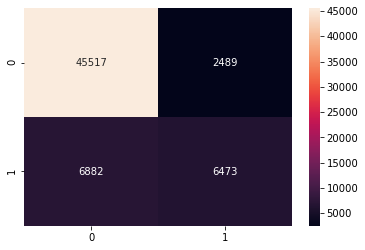

In [92]:
sns.heatmap(confusion_matrix(y_train,grid.predict(X_train)), annot=True, fmt='d')

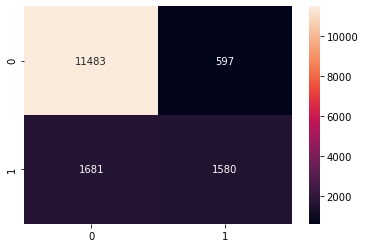

In [93]:
sns.heatmap(confusion_matrix(y_test,grid.predict(X_test)), annot=True, fmt='d')

In [94]:
from sklearn.metrics import classification_report
print('Test data report:')
print(classification_report(y_test,grid.predict(X_test)))
print('\n\nTrain data report:')
print(classification_report(y_train,grid.predict(X_train)))

Test data report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12080
           1       0.73      0.48      0.58      3261

    accuracy                           0.85     15341
   macro avg       0.80      0.72      0.75     15341
weighted avg       0.84      0.85      0.84     15341



Train data report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     48006
           1       0.72      0.48      0.58     13355

    accuracy                           0.85     61361
   macro avg       0.80      0.72      0.74     61361
weighted avg       0.84      0.85      0.84     61361



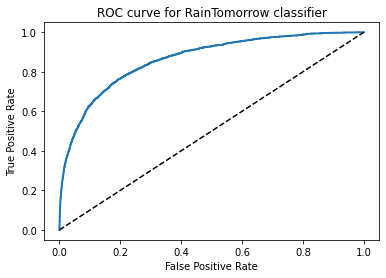

In [95]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train,y_train)
print('train score: ', rf.score(X_train,y_train))
print('test score: ', rf.score(X_test,y_test))

train score:  0.8522677270579032
test score:  0.8444690698129196


In [106]:
!pip install xgboost

In [110]:
param = {'max_features':[0.5,1], 'max_depth': [10,12,14]}
rf = RandomForestClassifier(max_depth=5)
grid = GridSearchCV(rf,param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=5),
             param_grid={'max_depth': [10, 12, 14], 'max_features': [0.5, 1]})

In [111]:
grid.best_estimator_

RandomForestClassifier(max_depth=14, max_features=0.5)

In [112]:
grid.best_score_

0.8524958646676846

In [113]:
grid.best_params_

{'max_depth': 14, 'max_features': 0.5}

In [115]:
rf = RandomForestClassifier(max_depth=10,max_features=0.5)
rf.fit(X_train,y_train)
print('train score: ', rf.score(X_train,y_train))
print('test score: ', rf.score(X_test,y_test))

train score:  0.8798585420706964
test score:  0.8539860504530343


Text(0.5, 1.0, 'Train Data Confusion Matrix')

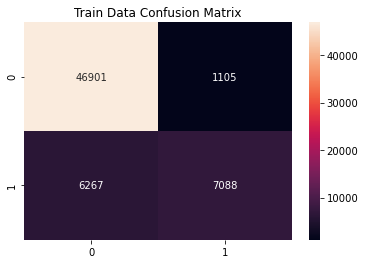

In [118]:
sns.heatmap(confusion_matrix(y_train,rf.predict(X_train)), annot=True, fmt='d')
plt.title('Train Data Confusion Matrix')

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_train,rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     48006
           1       0.87      0.53      0.66     13355

    accuracy                           0.88     61361
   macro avg       0.87      0.75      0.79     61361
weighted avg       0.88      0.88      0.87     61361



Text(0.5, 1.0, 'Test Data Confusion Matrix')

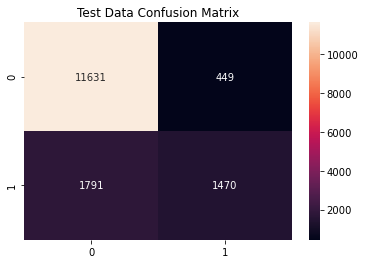

In [119]:
sns.heatmap(confusion_matrix(y_test,rf.predict(X_test)), annot=True, fmt='d')
plt.title('Test Data Confusion Matrix')

In [121]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12080
           1       0.77      0.45      0.57      3261

    accuracy                           0.85     15341
   macro avg       0.82      0.71      0.74     15341
weighted avg       0.85      0.85      0.84     15341



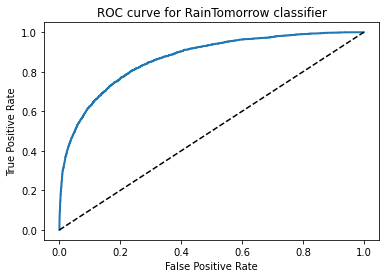

In [123]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()